In [46]:
# import pandas, numpy and pycaret
import pandas as pd
import numpy as np
from pycaret.regression import *
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('data/train.csv')
df.columns = df.columns.str.lower()
df.drop('id', inplace=True, axis=1) 
df.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


           saleprice  log_saleprice
count    1460.000000    1460.000000
mean   180921.195890      12.024057
std     79442.502883       0.399449
min     34900.000000      10.460271
25%    129975.000000      11.775105
50%    163000.000000      12.001512
75%    214000.000000      12.273736
max    755000.000000      13.534474


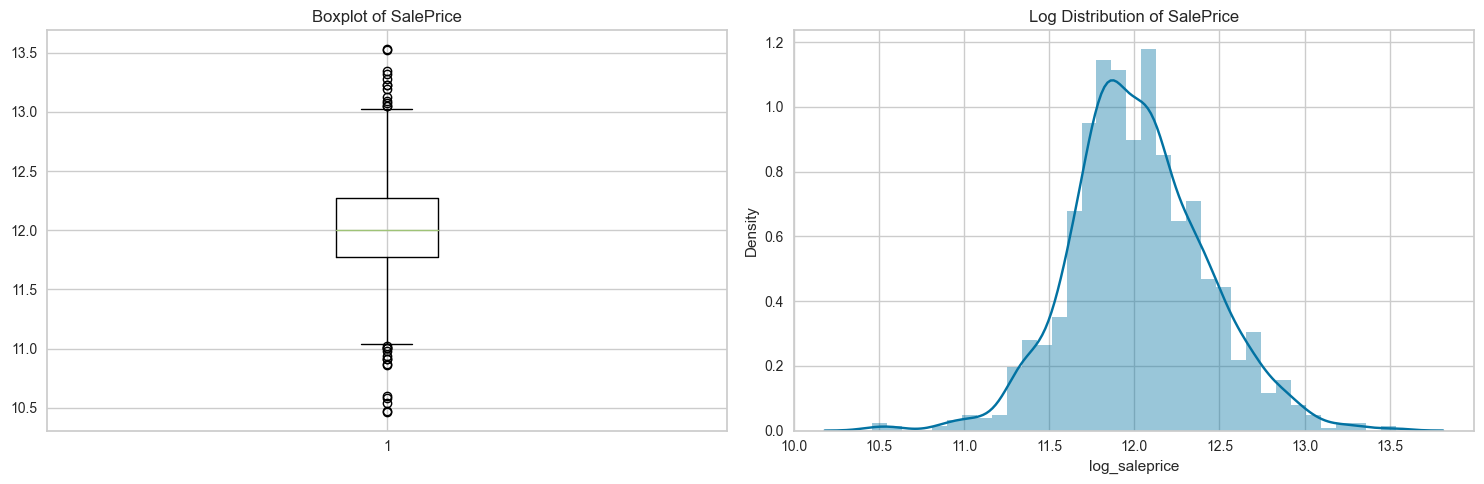

In [47]:
# Calculate np.log saleprice
df['log_saleprice'] = np.log1p(df['saleprice'])

print(df[['saleprice', 'log_saleprice']].describe())

# Set the overall subplot size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the first plot in the top-left subplot
axes[0].boxplot(df['log_saleprice'])
axes[0].set_title('Boxplot of SalePrice')

# Plot the second plot in the top-right subplot
sns.distplot(df['log_saleprice'], ax=axes[1])
axes[1].set_title('Log Distribution of SalePrice')
# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()


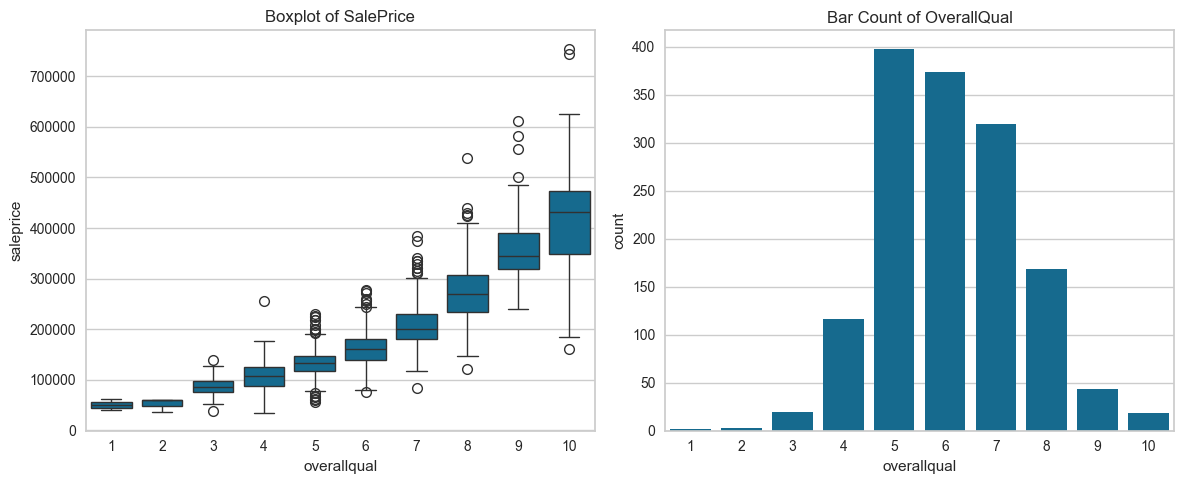

In [49]:
# Loos saleprice distribution for each ovrallqual
# Set the overall subplot size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the boxplot of saleprice in the first subplot
sns.boxplot(x='overallqual', y='saleprice', data=df, ax=axes[0])
axes[0].set_title('Boxplot of SalePrice')

# Plot the bar count of overallqual in the second subplot
sns.countplot(x='overallqual', data=df, ax=axes[1])
axes[1].set_title('Bar Count of OverallQual')

# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()


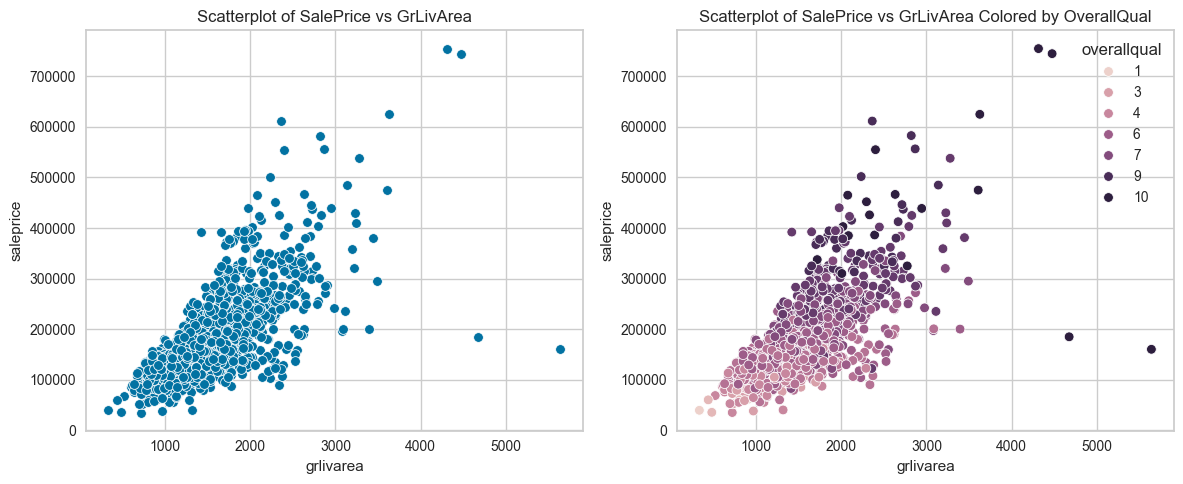

In [50]:
# Plot relation between saleprice and grlivarea
# Set the overall subplot size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the scatterplot of grlivarea and saleprice in the first subplot
sns.scatterplot(x='grlivarea', y='saleprice', data=df, ax=axes[0])
axes[0].set_title('Scatterplot of SalePrice vs GrLivArea')

# Plot the scatterplot of grlivarea and saleprice in the second subplot
sns.scatterplot(x='grlivarea', y='saleprice', data=df, ax=axes[1], hue='overallqual')
axes[1].set_title('Scatterplot of SalePrice vs GrLivArea Colored by OverallQual')

# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()

           saleprice  log_saleprice
count    1432.000000    1432.000000
mean   178788.431564      12.025793
std     69439.117053       0.365030
min     62383.000000      11.041064
25%    130000.000000      11.775297
50%    163000.000000      12.001512
75%    213062.500000      12.269345
max    451950.000000      13.021329


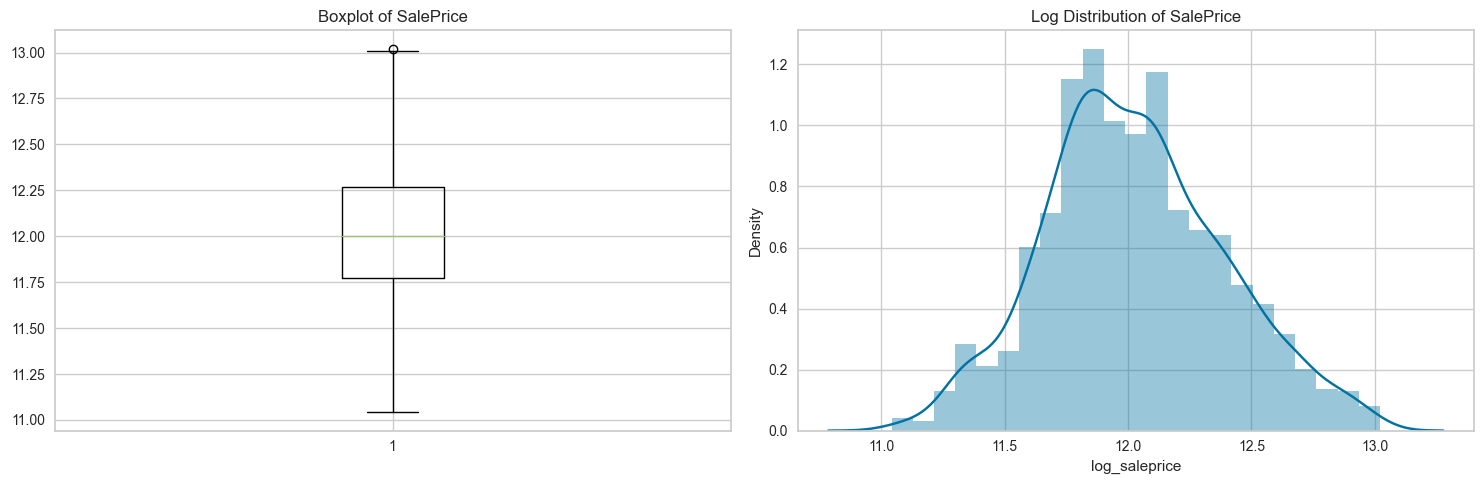

In [15]:
# Calculate first and third quartiles
first_quartile = df['log_saleprice'].describe()['25%']
third_quartile = df['log_saleprice'].describe()['75%']

# Calculate IQR
iqr = third_quartile - first_quartile

# Define upper and lower bounds for outlier detection
upper = third_quartile + 1.5*iqr
lower = first_quartile - 1.5*iqr

# Filter the extremes out of the logarithmized column
df = df[(df['log_saleprice'] < upper) & (df['log_saleprice'] > lower)]

print(df[['saleprice', 'log_saleprice']].describe())

# Set the overall subplot size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the first plot in the top-left subplot
axes[0].boxplot(df['log_saleprice'])
axes[0].set_title('Boxplot of SalePrice')

# Plot the second plot in the top-right subplot
sns.distplot(df['log_saleprice'], ax=axes[1])
axes[1].set_title('Log Distribution of SalePrice')
# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()

array([[<AxesSubplot: title={'center': 'mssubclass'}>,
        <AxesSubplot: title={'center': 'lotfrontage'}>,
        <AxesSubplot: title={'center': 'lotarea'}>,
        <AxesSubplot: title={'center': 'overallqual'}>,
        <AxesSubplot: title={'center': 'overallcond'}>,
        <AxesSubplot: title={'center': 'yearbuilt'}>],
       [<AxesSubplot: title={'center': 'yearremodadd'}>,
        <AxesSubplot: title={'center': 'masvnrarea'}>,
        <AxesSubplot: title={'center': 'bsmtfinsf1'}>,
        <AxesSubplot: title={'center': 'bsmtfinsf2'}>,
        <AxesSubplot: title={'center': 'bsmtunfsf'}>,
        <AxesSubplot: title={'center': 'totalbsmtsf'}>],
       [<AxesSubplot: title={'center': '1stflrsf'}>,
        <AxesSubplot: title={'center': '2ndflrsf'}>,
        <AxesSubplot: title={'center': 'lowqualfinsf'}>,
        <AxesSubplot: title={'center': 'grlivarea'}>,
        <AxesSubplot: title={'center': 'bsmtfullbath'}>,
        <AxesSubplot: title={'center': 'bsmthalfbath'}>],
     

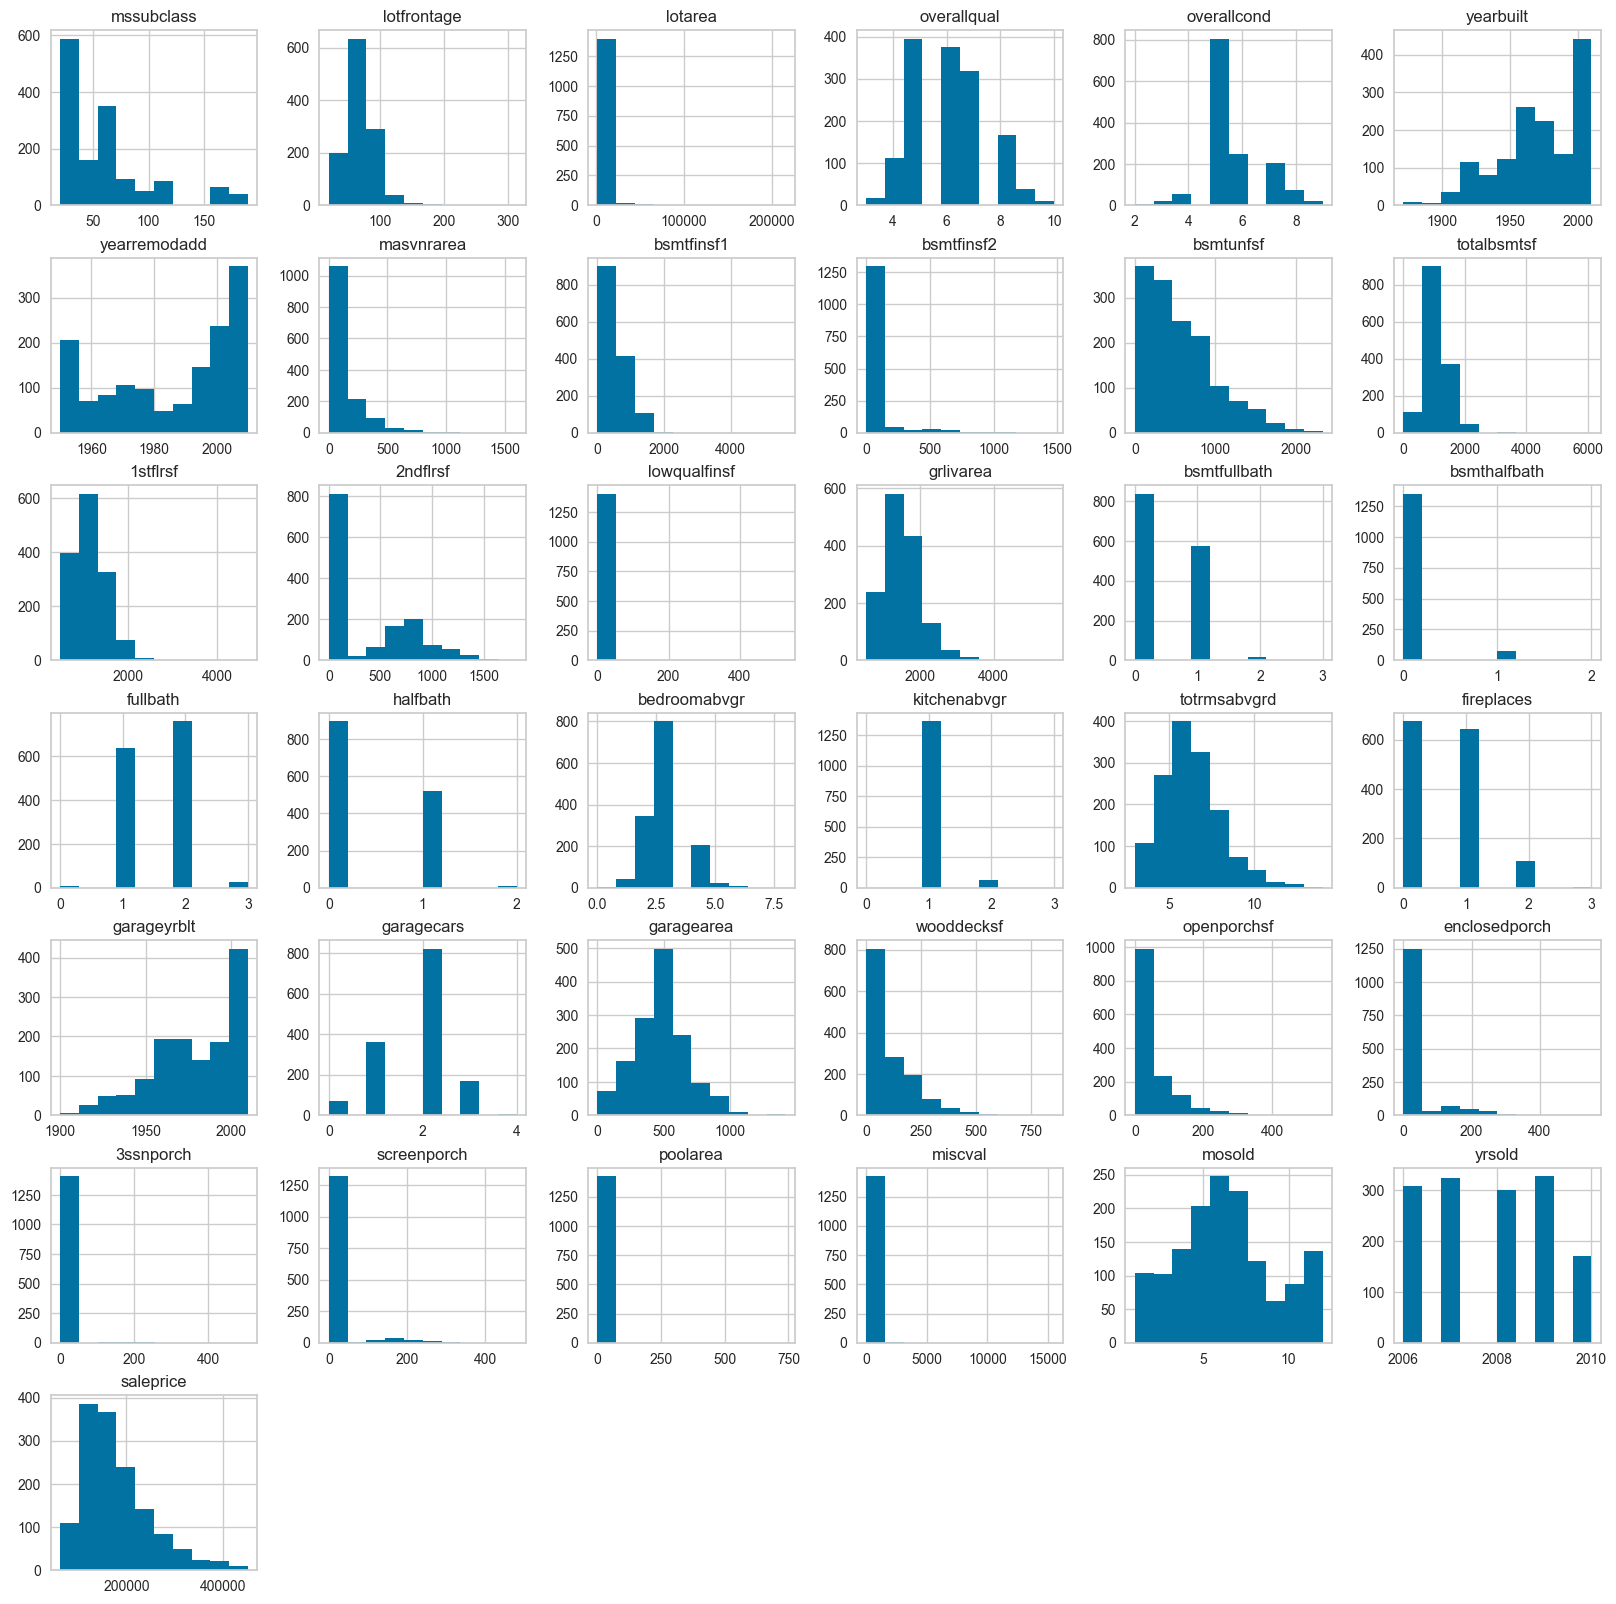

In [21]:
# Analysis for numeric values
df.select_dtypes([float,int]).hist(figsize=(20,20))

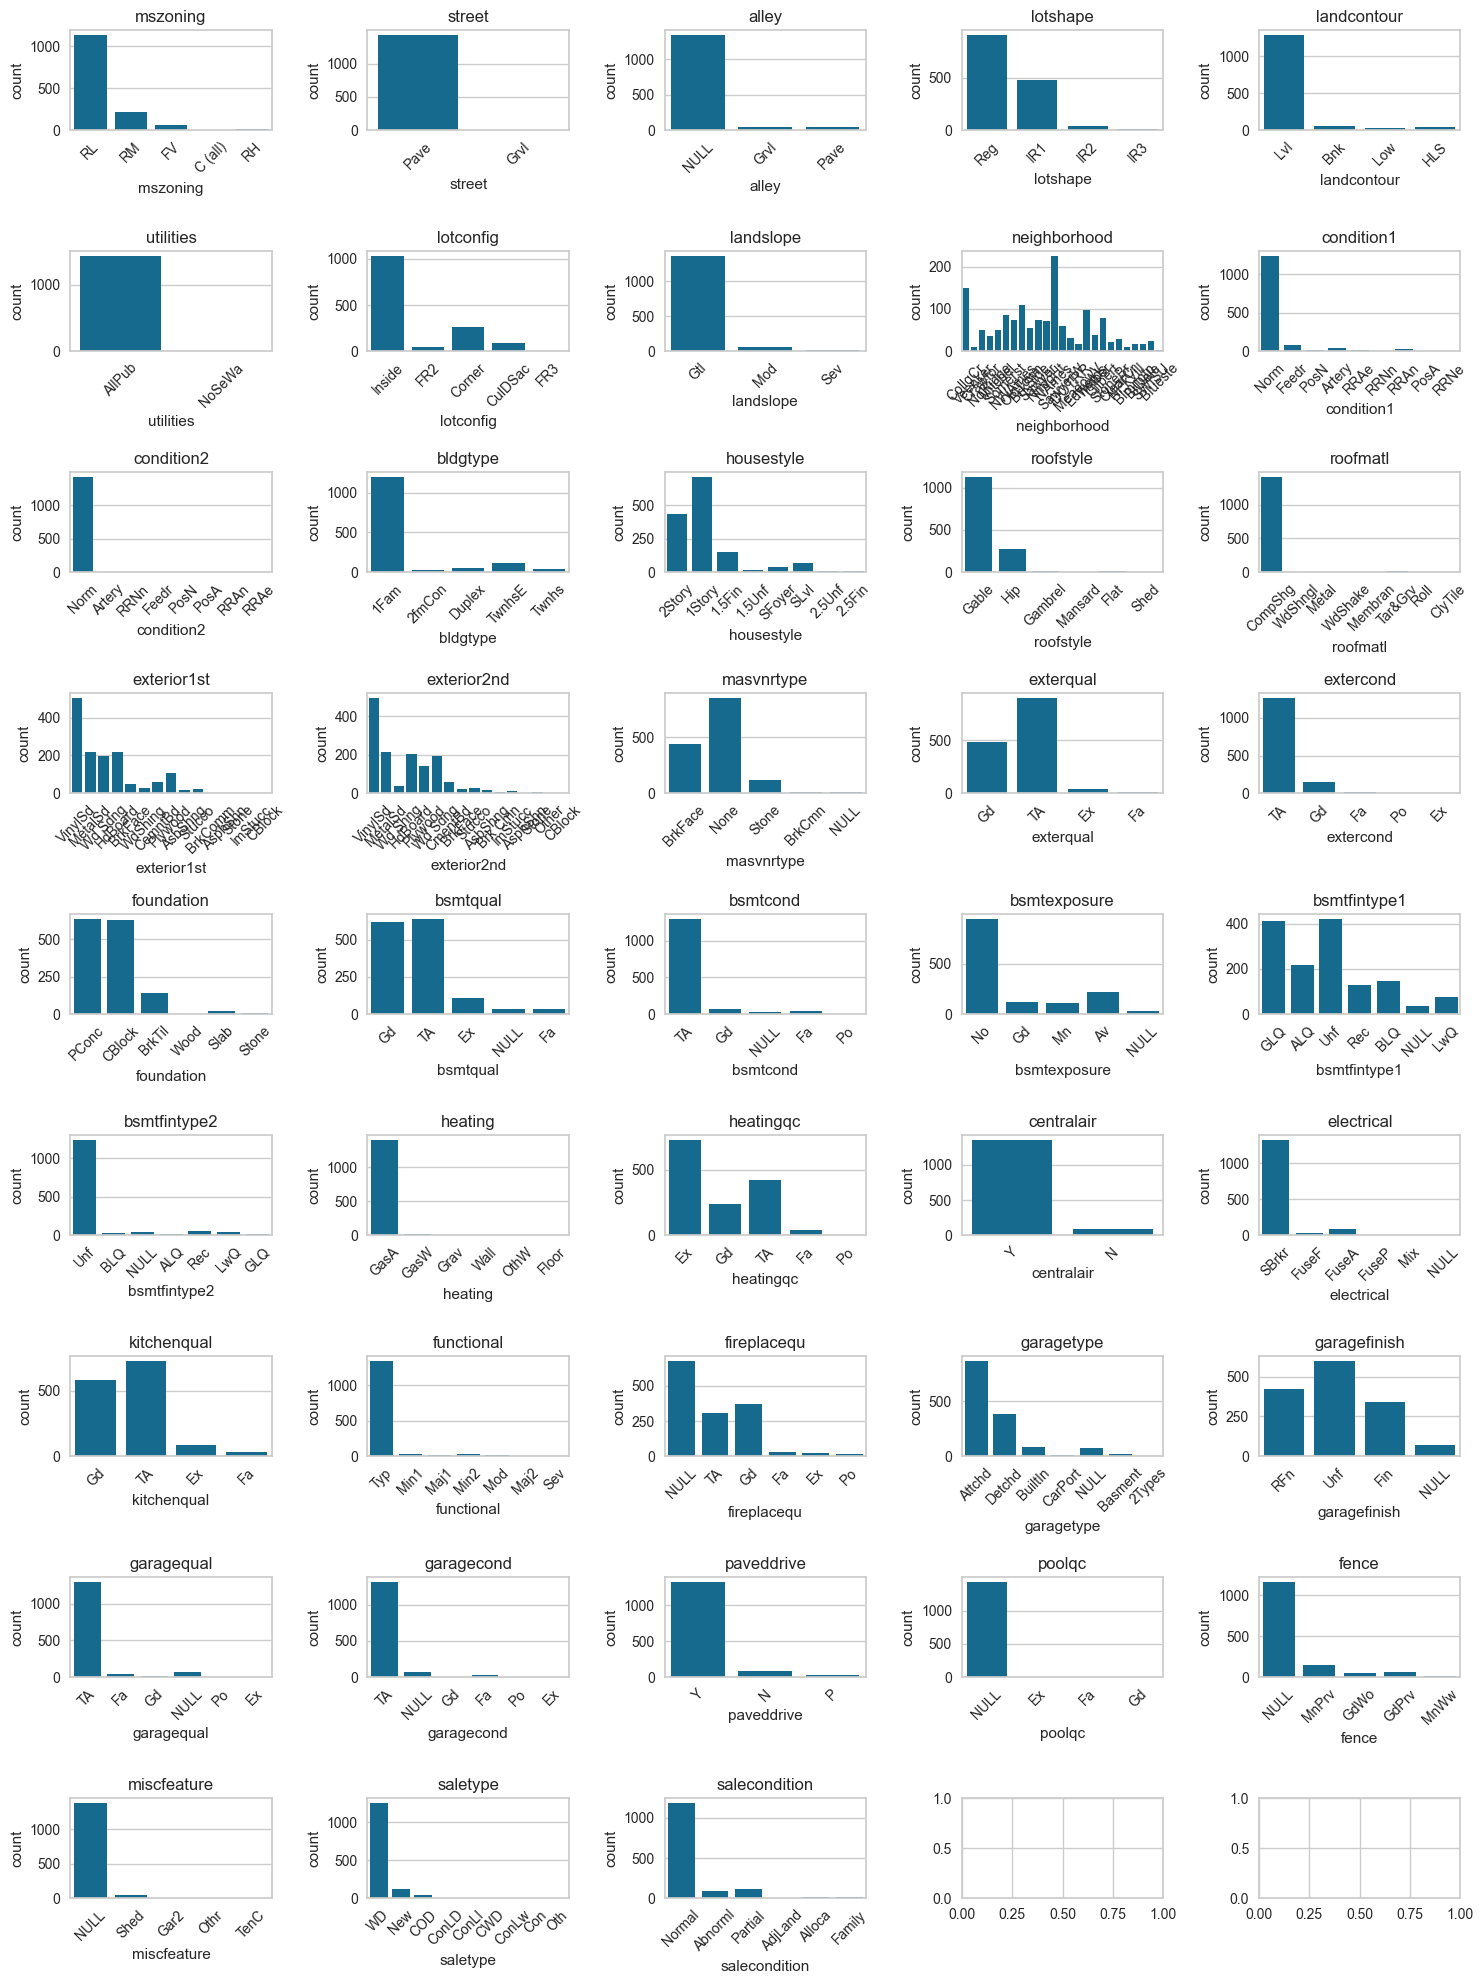

In [22]:
# Get columns of type 'object'
object_columns = df.select_dtypes('object').columns
df[object_columns]= df[object_columns].fillna('NULL')

# Set the overall subplot size
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(15, 20))

# Iterate over the columns and create a bar plot in each subplot
for i, col in enumerate(object_columns):
    row_index = i // 5  # Calculate the row index
    col_index = i % 5   # Calculate the column index
    sns.countplot(x=df[col], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)
    
    # Rotate x-axis labels by 45 degrees
    axes[row_index, col_index].tick_params(axis='x', rotation=45)

# Adjust the subplot layout
plt.tight_layout()
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2309
[LightGBM] [Info] Number of data points in the train set: 1145, number of used features: 117
[LightGBM] [Info] Start training from score 179592.180786


,Description,Value
0,Session id,42
1,Target,saleprice
2,Target type,Regression
3,Original data shape,"(1432, 80)"
4,Transformed data shape,"(1432, 16)"
5,Transformed train set shape,"(1145, 16)"
6,Transformed test set shape,"(287, 16)"
7,Ordinal features,21
8,Numeric features,36
9,Categorical features,43


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,18193.3032,695793197.2914,26135.1010,0.8551,0.1384,0.1047,0.6200
et,Extra Trees Regressor,18209.4079,714878752.7183,26573.7099,0.8490,0.1386,0.1046,1.1550
lightgbm,Light Gradient Boosting Machine,18750.4973,745428822.9021,27125.1450,0.8445,0.1410,0.1070,0.6330
rf,Random Forest Regressor,18957.7277,769449638.3487,27512.2520,0.8388,0.1433,0.1088,1.2690
dt,Decision Tree Regressor,26723.8821,1555068796.5444,39014.3508,0.6757,0.2025,0.1531,2.9030


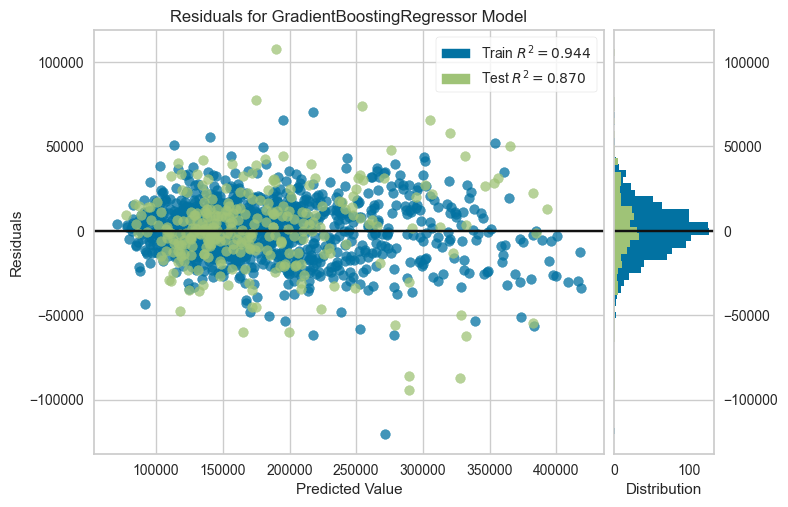

In [23]:
# setup pycaret model
df.drop(columns= 'log_saleprice', inplace=True)
exp1 = setup(df, target='saleprice', session_id=42, 
             numeric_imputation='median',
             rare_to_value=.1, 
             bin_numeric_features=['yearbuilt', 'yearremodadd', 'garageyrblt'],
             feature_selection=True, 
            #  feature_selection_method= 'sequential',  # Enable feature selection
            #  pca= True, # Enable PCA
             remove_multicollinearity=True, multicollinearity_threshold=.8, # Enable multicollinearity detection
             normalize=True, normalize_method='robust', # Enable normalization
            #  polynomial_features=True,  # Enable polynomial features
             train_size=0.8,  # Adjust the train-test split ratio
             )
# benchmark models
best_model = compare_models(include = ['dt', 'rf', 'et', 'gbr',  'lightgbm'], fold=10, round=4)
plot_model(best_model)

In [24]:
# Creating final model
dt = create_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:20:12
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15345.8777,398803983.3793,19970.0772,0.8834,0.1141,0.0913
1,18244.0648,780034779.5985,27929.1027,0.8574,0.1478,0.1068
2,20465.2441,936479071.2275,30601.9455,0.8262,0.1387,0.1058
3,17449.6092,588729268.9442,24263.7439,0.8505,0.1259,0.0984
4,19447.4358,1077997776.3197,32832.8765,0.7556,0.1576,0.1115
5,18460.6977,656029088.4764,25613.0648,0.8486,0.1561,0.1207
6,19056.1358,719960712.6312,26832.0836,0.8717,0.1375,0.1047
7,18984.5282,604104197.7047,24578.5312,0.8721,0.1525,0.1217
8,16339.9565,497397089.1968,22302.4010,0.8967,0.1254,0.0925


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14161.4884,314458303.8573,17732.9722,0.9080,0.1083,0.0868
1,17311.9201,723042105.0903,26889.4423,0.8678,0.1391,0.1019
2,19047.6309,827132422.2554,28759.9100,0.8465,0.1291,0.0988
3,17164.0889,671607927.1837,25915.3994,0.8294,0.1277,0.0941
4,17160.2155,749869270.3214,27383.7410,0.8300,0.1375,0.0990
5,17471.8613,742350927.6881,27246.1177,0.8287,0.1586,0.1139
6,18996.9715,771710205.0465,27779.6725,0.8625,0.1363,0.1021
7,17933.8379,678907255.5595,26055.8488,0.8563,0.1467,0.1114
8,17316.9792,555368136.9973,23566.2500,0.8847,0.1288,0.0979


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


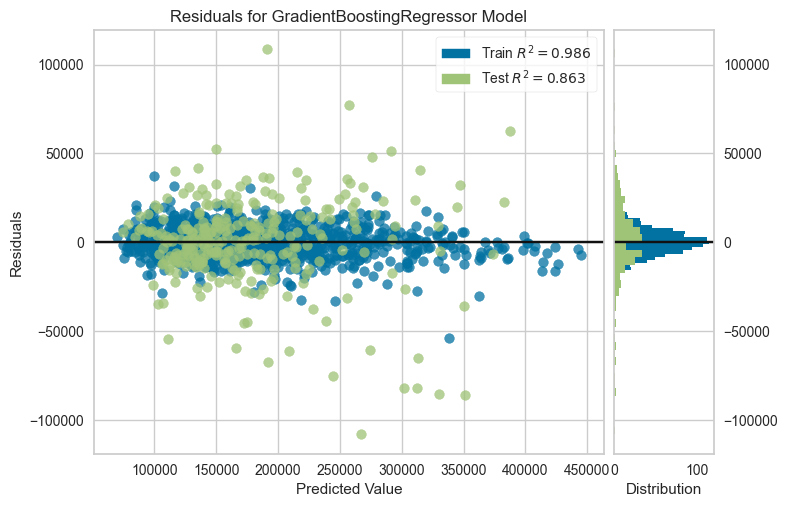

In [25]:
# Tune model hyperparameters
search_params = {'n_estimators': [100, 500, 1000], 'learning_rate': np.arange(0.01, 0.1, 0.05)}
tuned_dt = tune_model(dt, optimize='mae')
plot_model(tuned_dt)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:23:51
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14888.4553,369701704.3016,19227.6287,0.8919,0.1107,0.0882
1,18109.6842,725828771.3189,26941.2095,0.8673,0.1416,0.1059
2,18692.6706,846173617.1318,29089.0635,0.8430,0.1308,0.0968
3,17172.2410,557378776.4923,23608.8707,0.8584,0.1251,0.0979
4,19011.4106,917141961.1941,30284.3518,0.7921,0.1491,0.1087
5,18707.8932,866370275.3580,29434.1685,0.8001,0.1647,0.1233
6,19432.6051,746773463.9854,27327.1562,0.8670,0.1400,0.1075
7,19350.9314,657167859.9787,25635.2854,0.8609,0.1531,0.1222
8,16326.5555,487565206.9319,22080.8788,0.8988,0.1225,0.0922


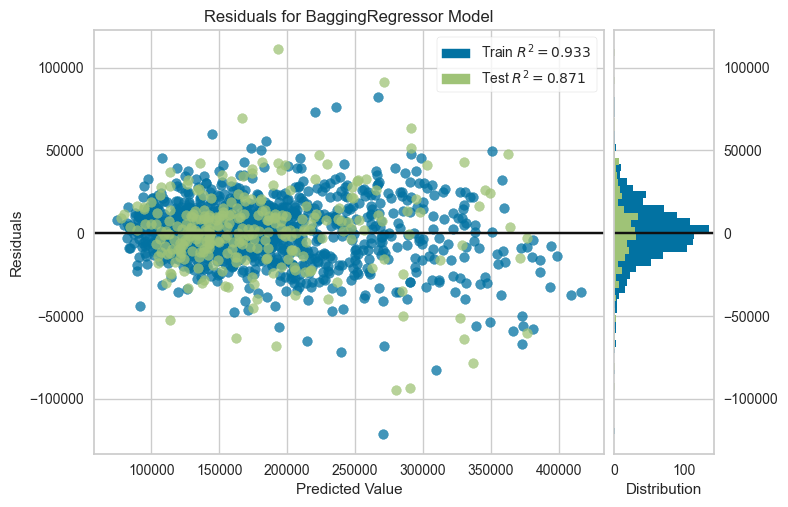

In [31]:
# Ensemble model with Bagging
bagging_dt = ensemble_model(dt, method = 'Bagging')
plot_model(bagging_dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13713.7897,292506822.3219,17102.8308,0.9144,0.1074,0.0855
1,17970.0864,721489380.3116,26860.5544,0.8681,0.1398,0.1053
2,19233.1998,854254525.0871,29227.6329,0.8415,0.1298,0.0985
3,17033.8737,604004416.6337,24576.5013,0.8466,0.1250,0.0950
4,18230.2666,862268707.1219,29364.4123,0.8045,0.1477,0.1062
5,17753.8761,726564395.4476,26954.8585,0.8323,0.1588,0.1164
6,19506.8300,728162730.3512,26984.4906,0.8703,0.1365,0.1062
7,17838.6880,610967227.8653,24717.7513,0.8707,0.1413,0.1112
8,17345.1137,555032788.3006,23559.1339,0.8848,0.1328,0.1001


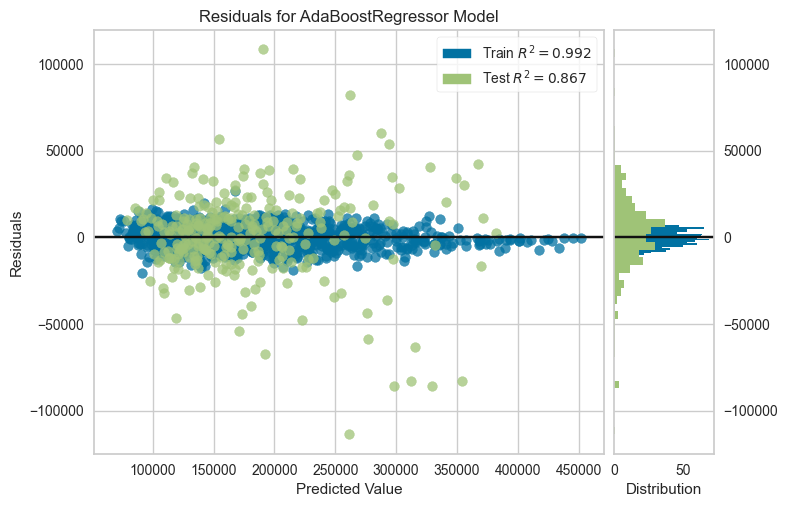

In [27]:
# Ensemble model with Boosting
boost_dt = ensemble_model(tuned_dt, method = 'Boosting')
plot_model(boost_dt)

In [32]:
# Blend models
final_model = finalize_model(bagging_dt)

# Load test data
df_test = pd.read_csv('data/test.csv')
df_test.columns = df_test.columns.str.lower()
df_test.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


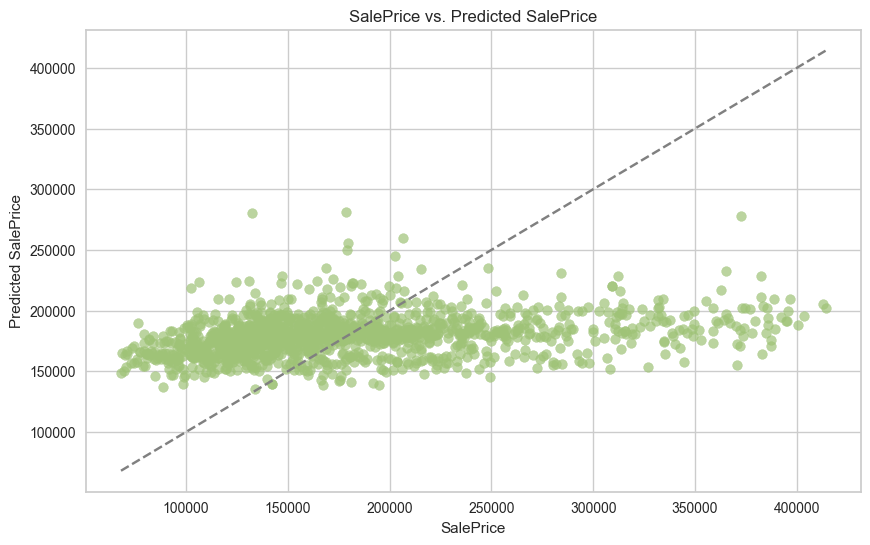

In [33]:
# predict salesprice for df_test
df_result = predict_model(final_model, data=df_test.drop('id', axis=1))

# Comparing real results
df_result['id'] = df_test['id']
submission = pd.read_csv('data/sample_submission.csv')
submission.columns = submission.columns.str.lower()
df_result['saleprice_prediction'] = df_result['id'].map(submission.set_index('id')['saleprice'])

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(df_result['prediction_label'], df_result['saleprice_prediction'], alpha=0.7, color='g')
plt.plot([min(df_result['prediction_label']), max(df_result['prediction_label'])], [min(df_result['prediction_label']), max(df_result['prediction_label'])], linestyle='--', color='gray')
plt.title('SalePrice vs. Predicted SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

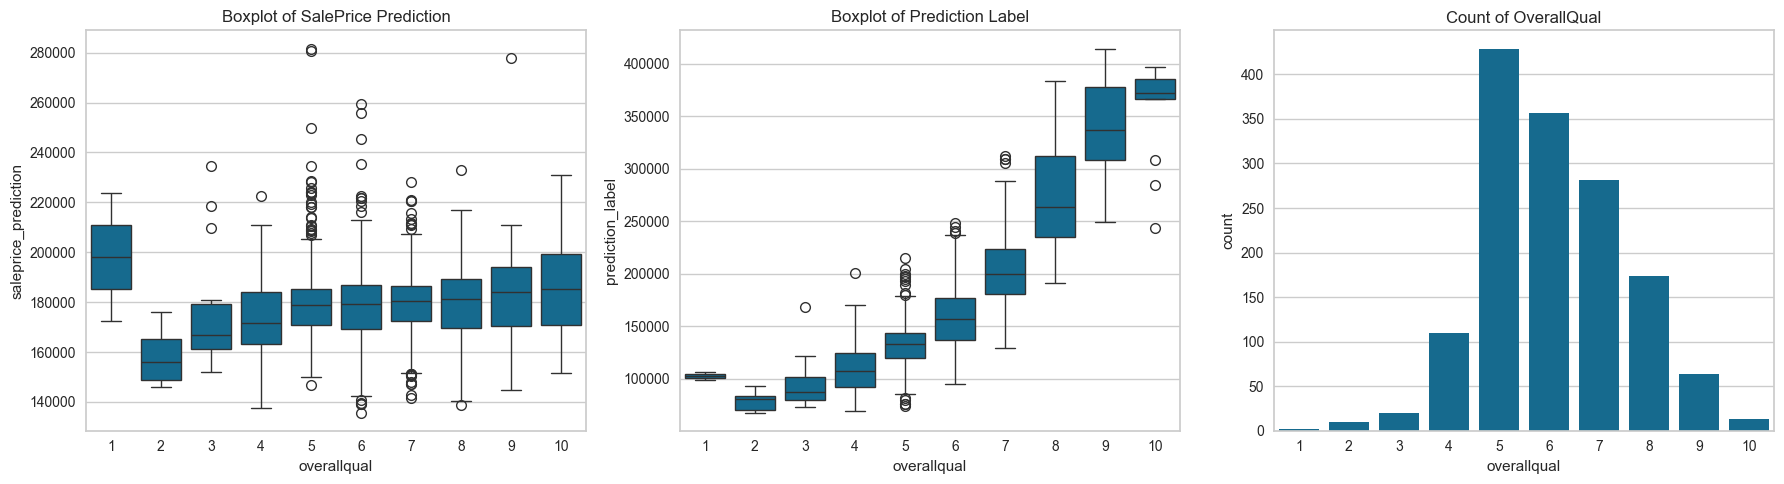

In [42]:
# Set the overall subplot size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot the boxplot of saleprice_prediction in the first subplot
sns.boxplot(x='overallqual', y='saleprice_prediction', data=df_result, ax=axes[0])
axes[0].set_title('Boxplot of SalePrice Prediction')

# Plot the boxplot of prediction_label in the second subplot
sns.boxplot(x='overallqual', y='prediction_label', data=df_result, ax=axes[1])
axes[1].set_title('Boxplot of Prediction Label')

# Plot the count of overallqual in the third subplot
sns.countplot(x='overallqual', data=df_result, ax=axes[2])
axes[2].set_title('Count of OverallQual')

# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()

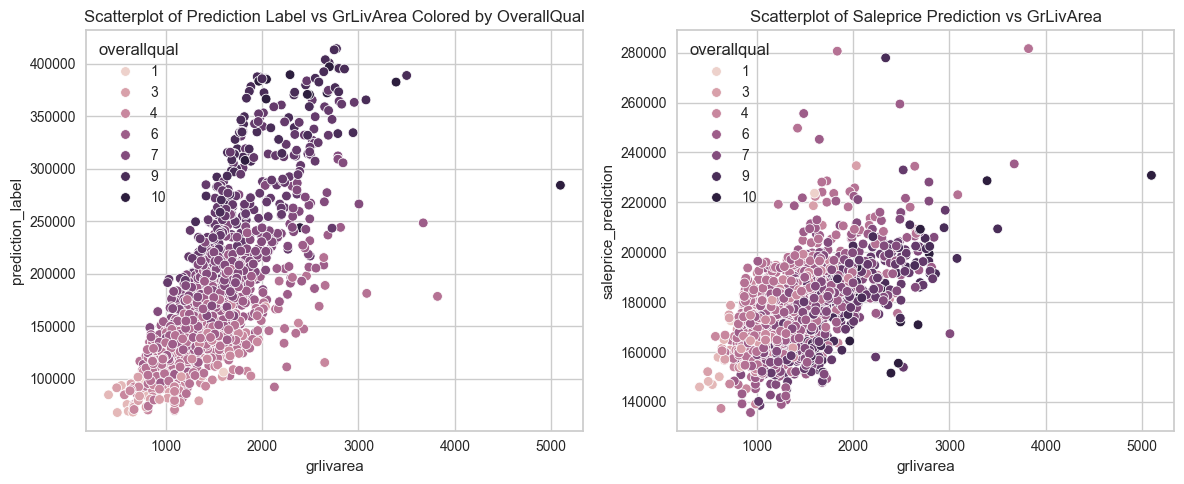

In [51]:
# Plot relation between saleprice_prediction and grlivarea
# Set the overall subplot size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the scatterplot of grlivarea and prediction_label in the second subplot
sns.scatterplot(x='grlivarea', y='prediction_label', data=df_result, ax=axes[0], hue='overallqual')
axes[0].set_title('Scatterplot of Prediction Label vs GrLivArea Colored by OverallQual')

# Plot the scatterplot of grlivarea and prediction_label in the second subplot
sns.scatterplot(x='grlivarea', y='saleprice_prediction', data=df_result, ax=axes[1], hue='overallqual')
axes[1].set_title('Scatterplot of Saleprice Prediction vs GrLivArea')

# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()


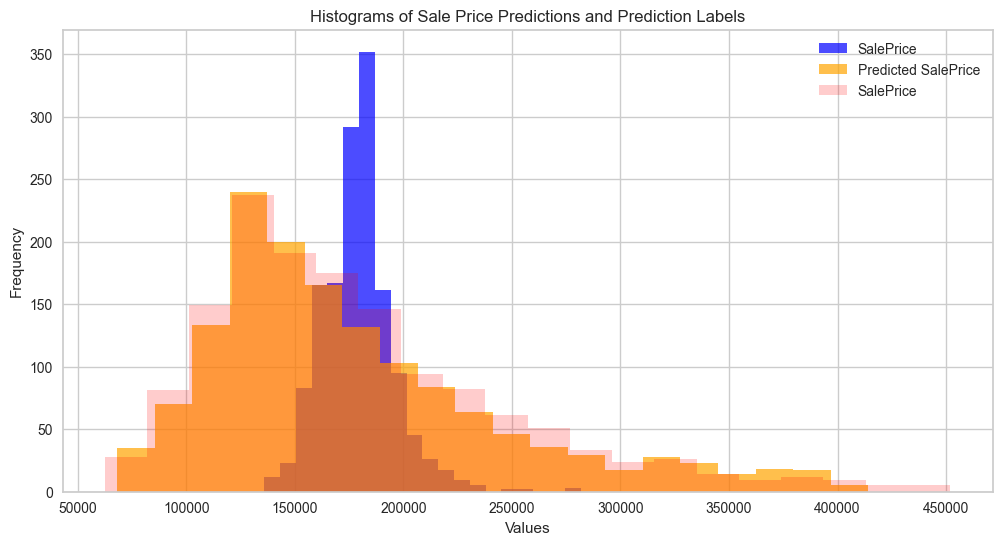

In [34]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Plot the histogram for 'saleprice_prediction'
plt.hist(df_result['saleprice_prediction'], bins=20, color='blue', alpha=0.7, label='SalePrice')

# Plot the histogram for 'prediction_label'
plt.hist(df_result['prediction_label'], bins=20, color='orange', alpha=0.7, label='Predicted SalePrice')

# Plot the histogram for trained saleprice
plt.hist(df['saleprice'], bins=20, color='red', alpha=0.2, label='SalePrice')


# Set titles and labels
plt.title('Histograms of Sale Price Predictions and Prediction Labels')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()